In [112]:
# importing required libraries
import numpy as np
import pandas as pd    # for data handling and wrangling
from matplotlib import pyplot as plt  # for plotting the data

from sklearn.impute import SimpleImputer  # imputer to handle missing datas or NaN datas

In [67]:
df = pd.read_csv('covid_19_data.csv')

In [68]:
df.head(5)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [69]:
# dropping coloumns which are not required
df.drop(['SNo','Last Update'], axis=1, inplace= True) 

# axis 1 means dropping a coloum
# inplace, when true, makes the changes inside the original file.

In [70]:
# rename coloumns
df.rename(columns={'ObservationDate': 'Date', 'Province/State':'State', 'Country/Region': 'Country'}, inplace=True)

In [71]:
# convert date-time format


df['Date'] = pd.to_datetime(df['Date'])


In [72]:
# getting an imputer to resolve the missing data issues
imputer = SimpleImputer(strategy= 'constant')  # constant strategy

df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)  # creating a copy

In [102]:
# grouping countries with Dates
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

# summing it up and resetting index

In [105]:
df3.head(10)

Country       Date  Confirmed  Deaths  Recovered
0       Azerbaijan 2020-02-28        1.0     0.0        0.0
1  ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2      Afghanistan 2020-02-24        1.0     0.0        0.0
3      Afghanistan 2020-02-25        1.0     0.0        0.0
4      Afghanistan 2020-02-26        1.0     0.0        0.0
5      Afghanistan 2020-02-27        1.0     0.0        0.0
6      Afghanistan 2020-02-28        1.0     0.0        0.0
7      Afghanistan 2020-02-29        1.0     0.0        0.0
8      Afghanistan 2020-03-01        1.0     0.0        0.0
9      Afghanistan 2020-03-02        1.0     0.0        0.0

In [103]:
# checking how many countries are there in total (unique)
countries = df3['Country'].unique()
len(countries)


229

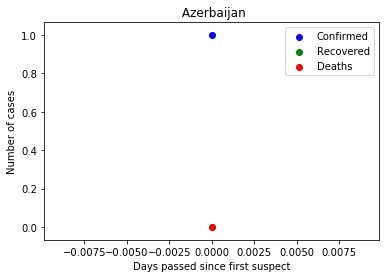

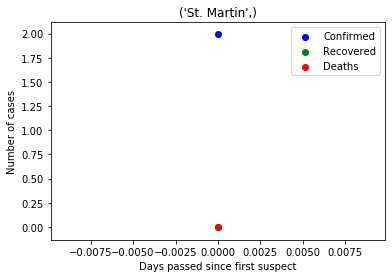

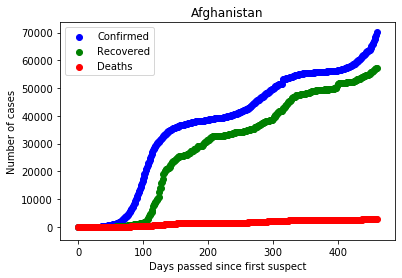

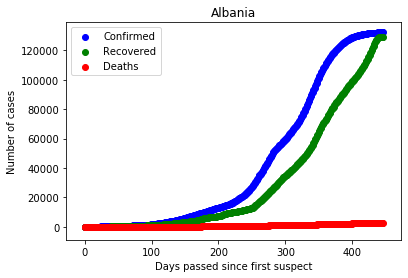

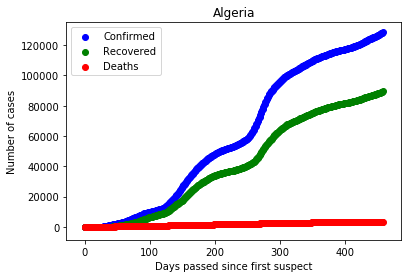

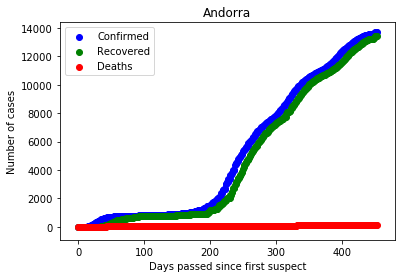

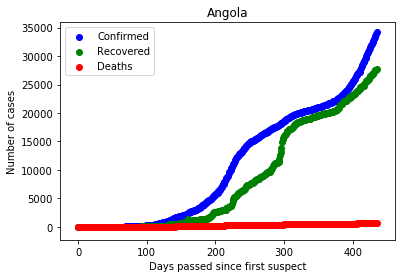

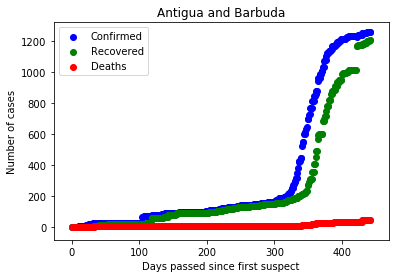

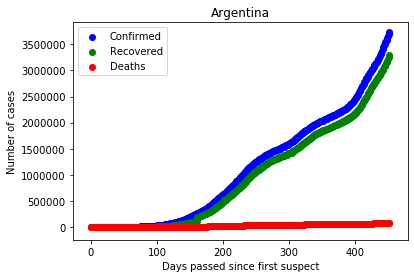

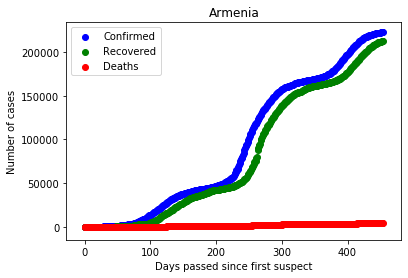

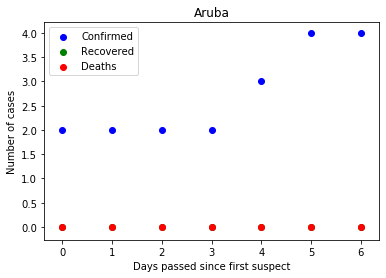

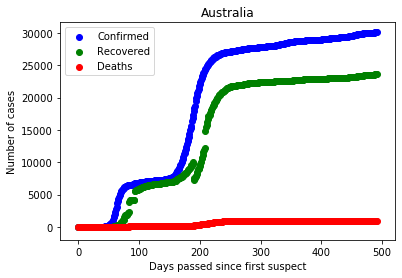

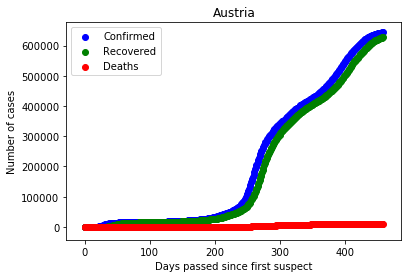

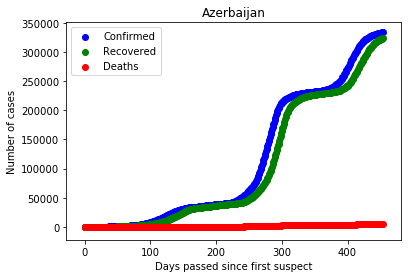

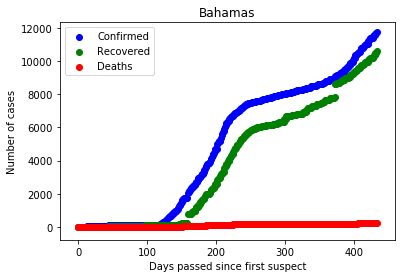

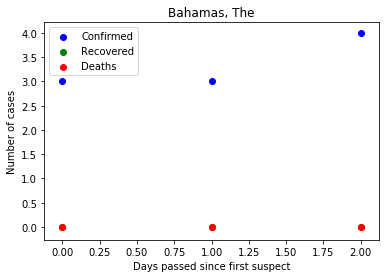

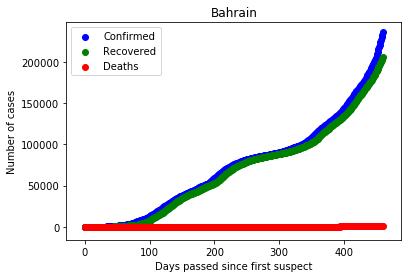

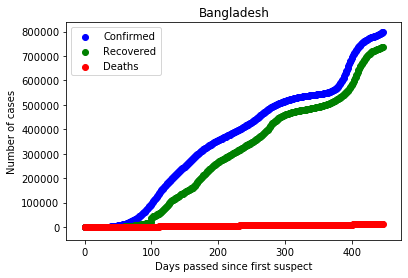

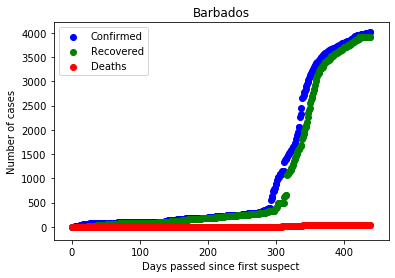

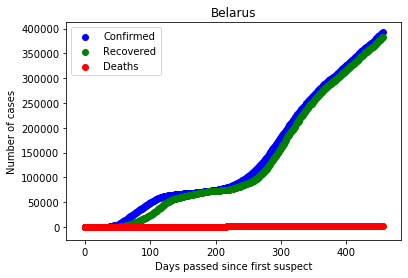

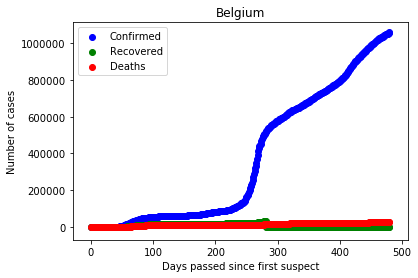

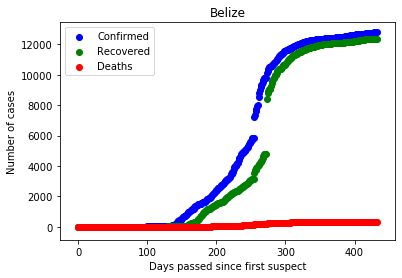

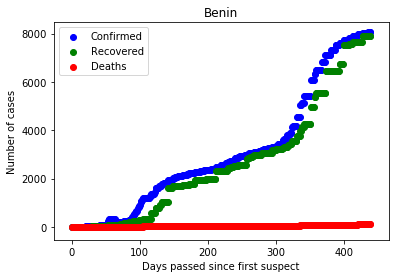

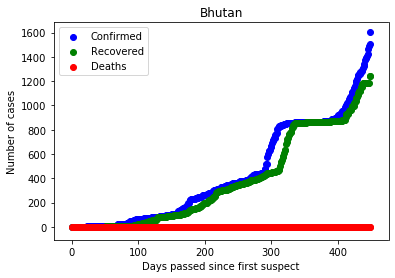

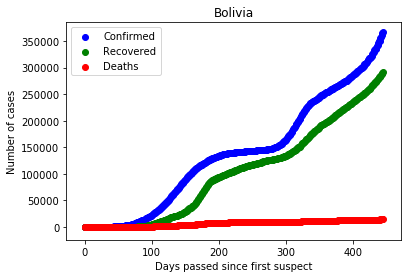

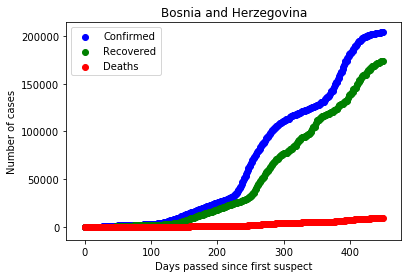

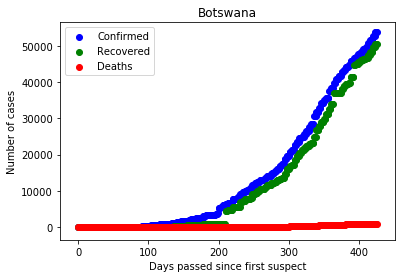

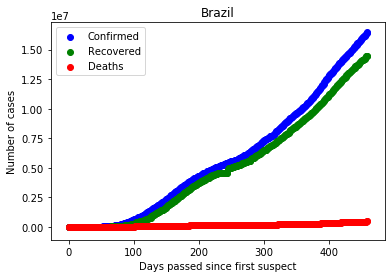

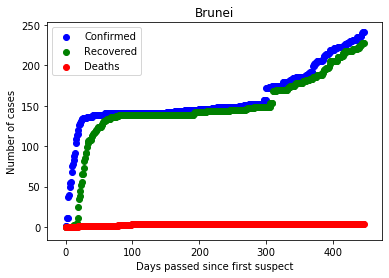

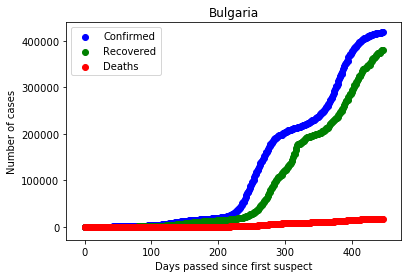

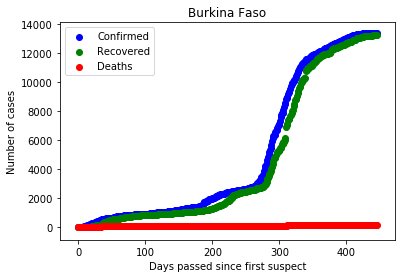

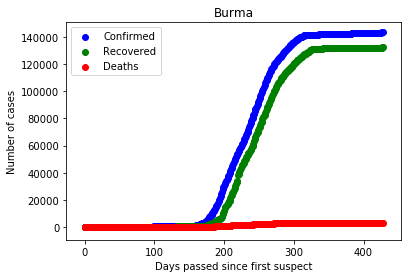

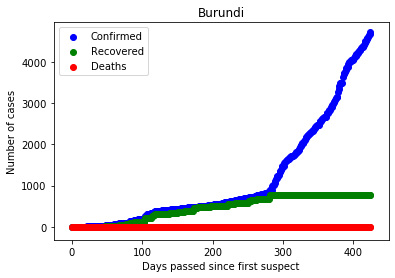

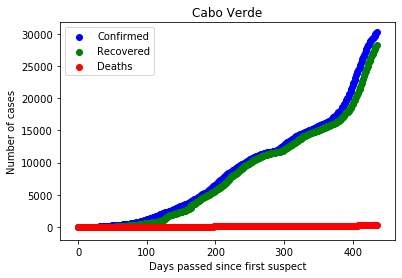

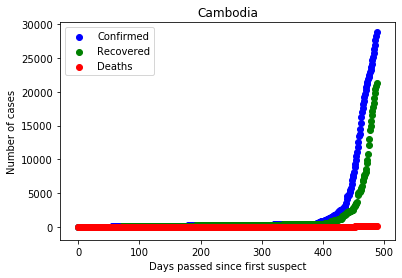

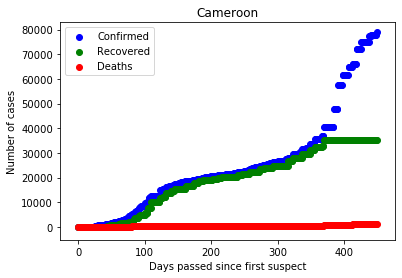

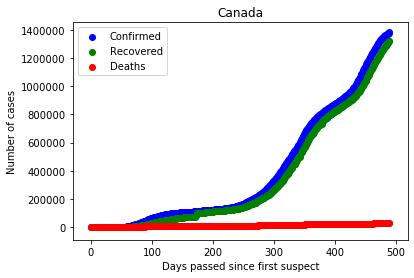

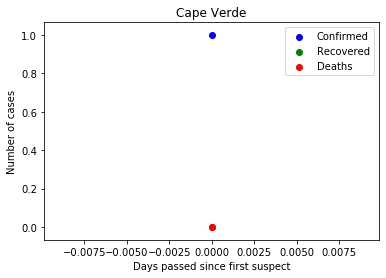

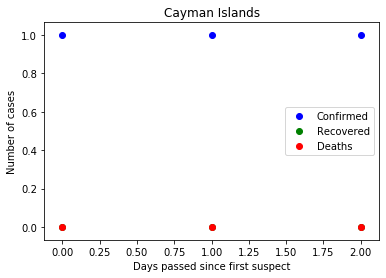

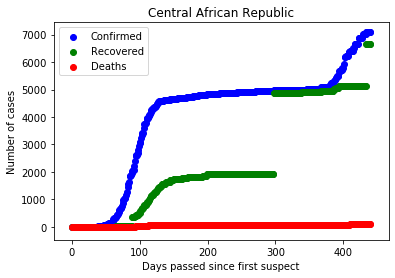

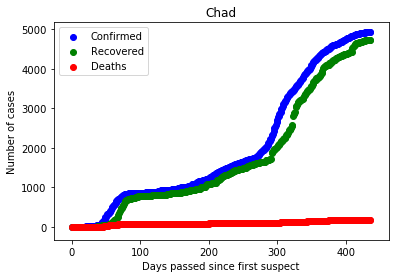

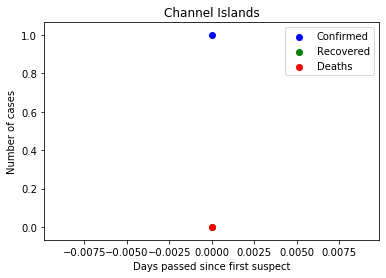

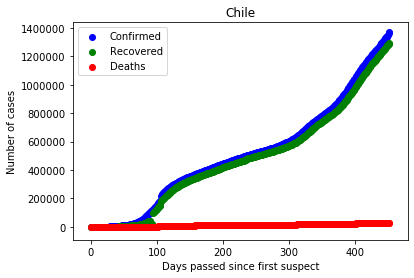

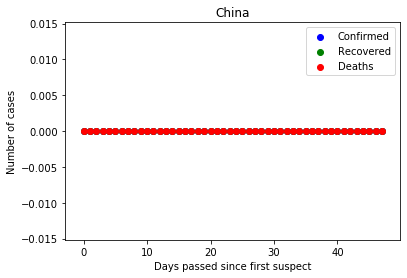

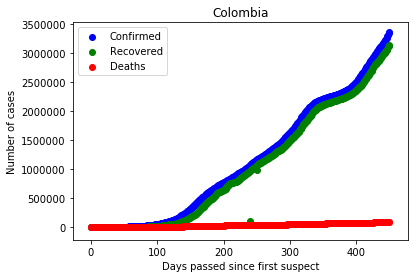

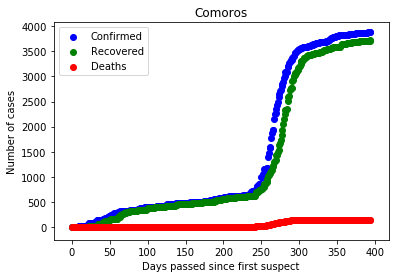

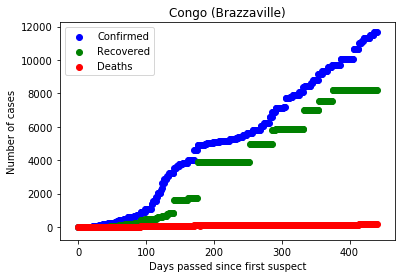

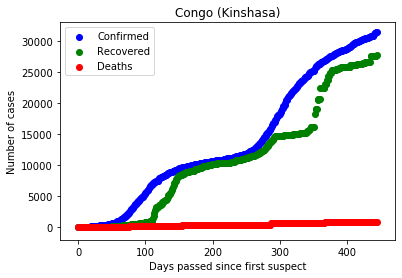

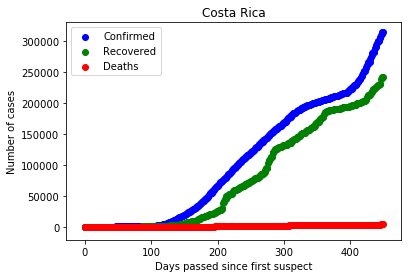

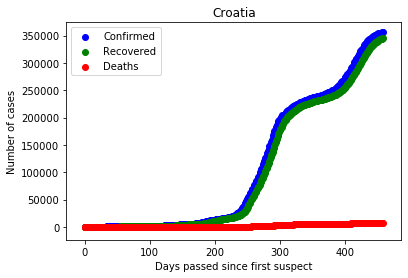

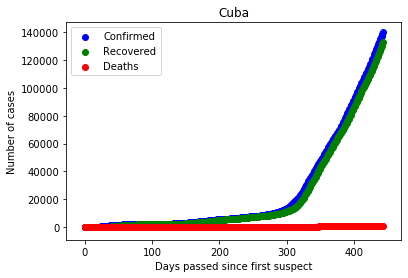

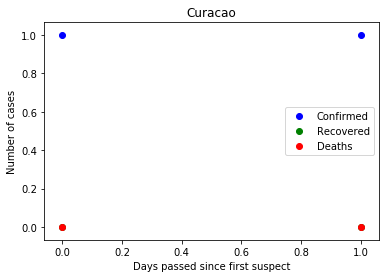

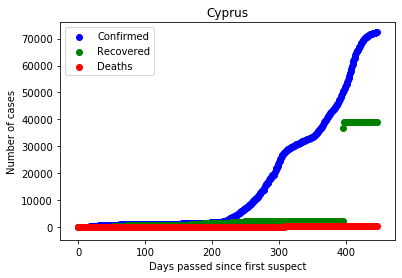

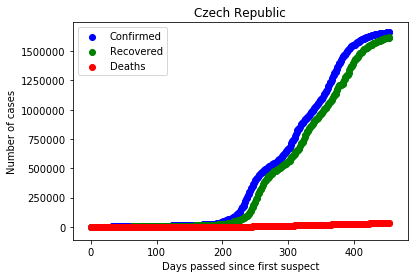

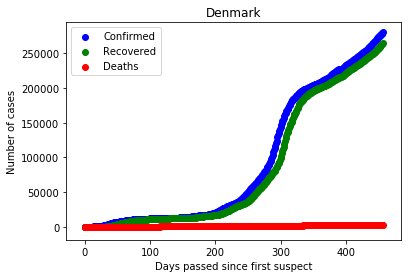

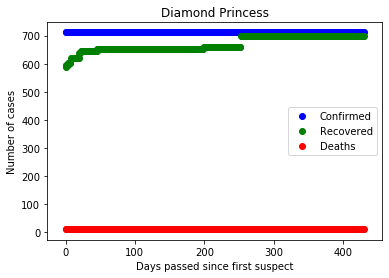

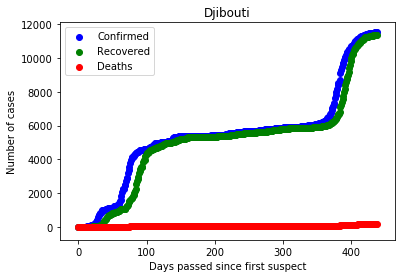

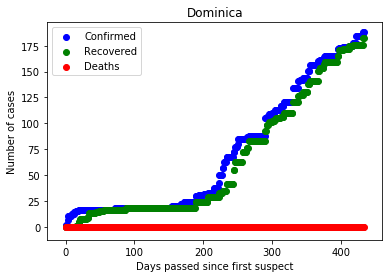

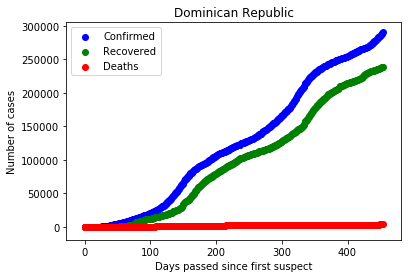

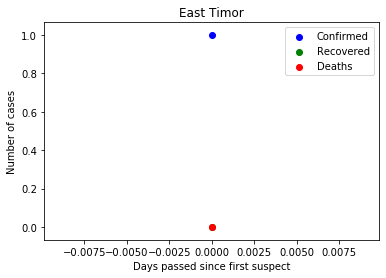

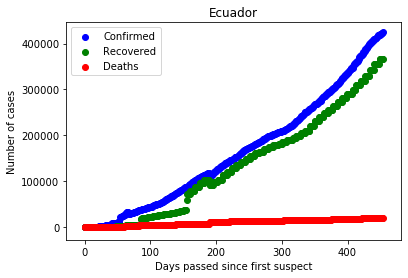

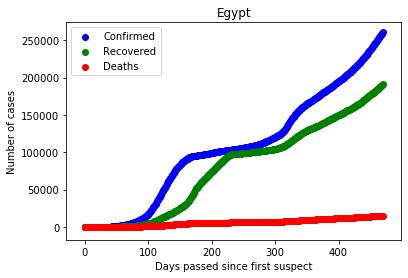

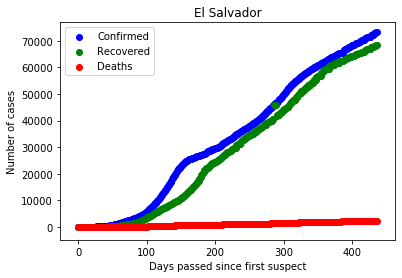

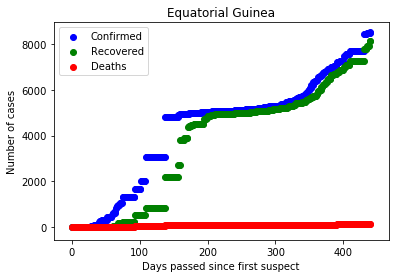

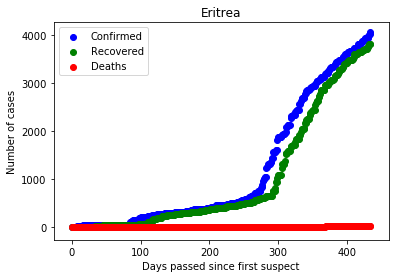

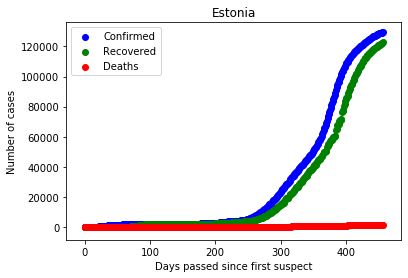

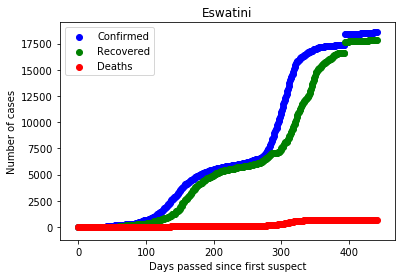

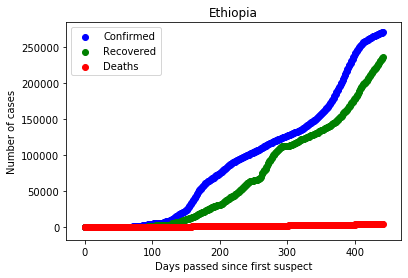

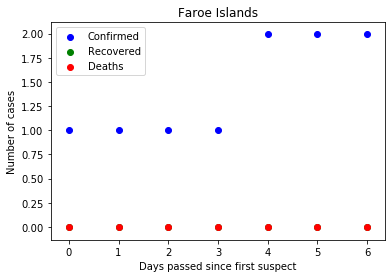

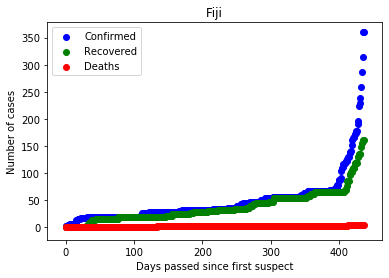

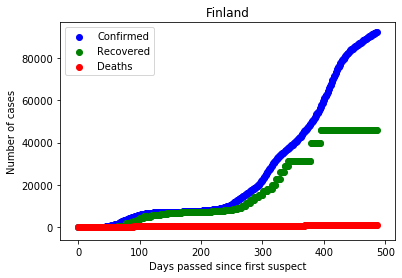

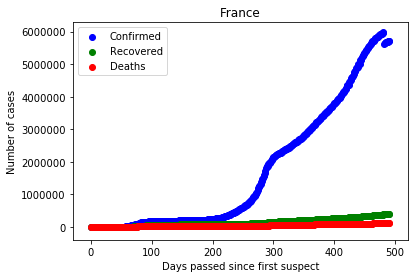

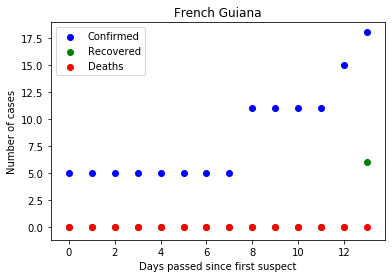

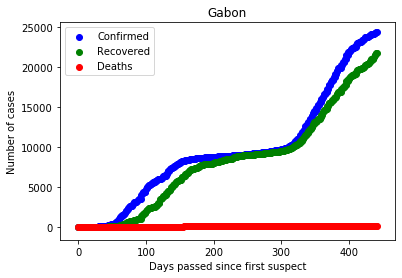

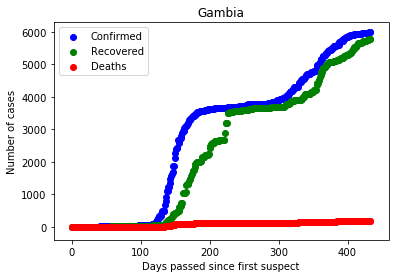

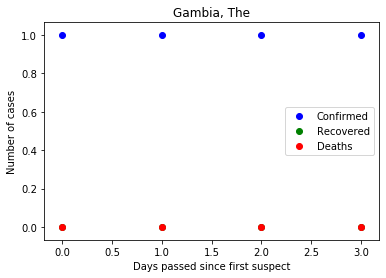

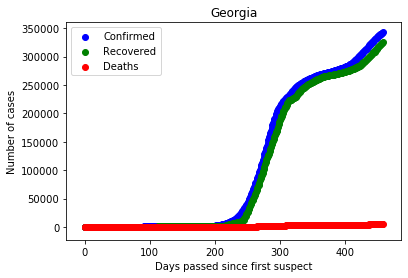

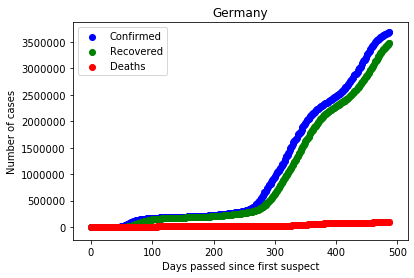

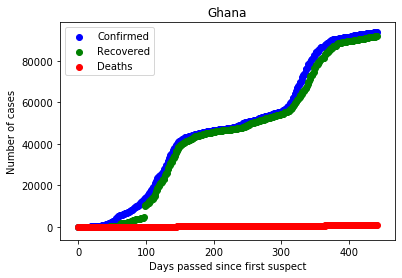

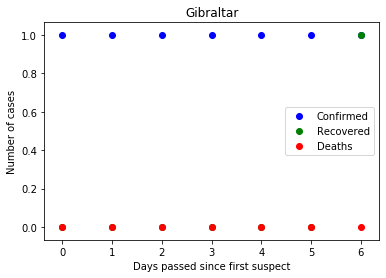

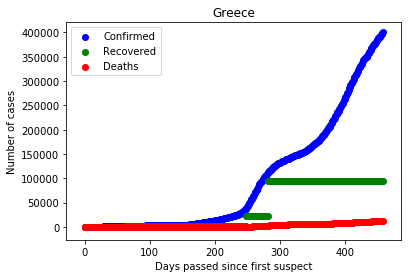

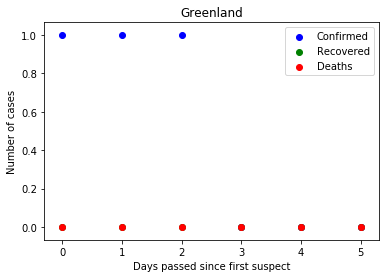

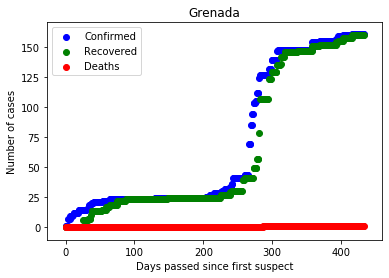

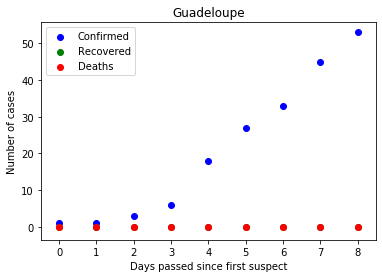

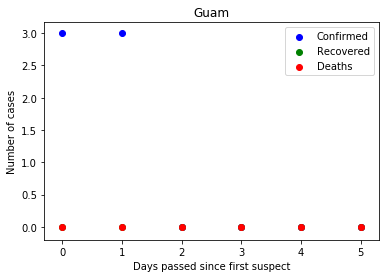

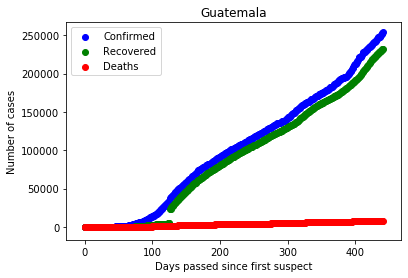

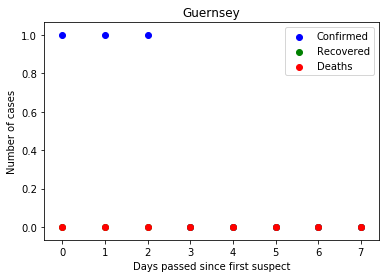

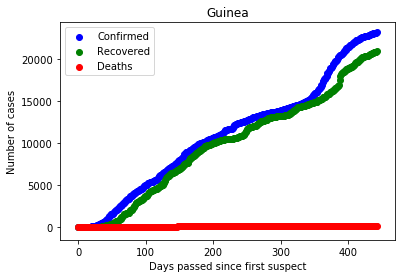

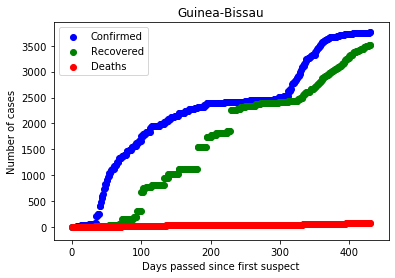

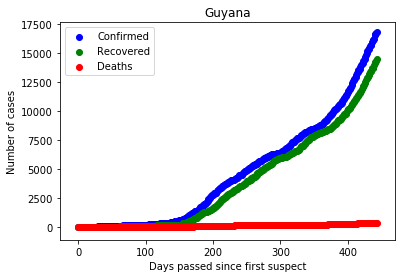

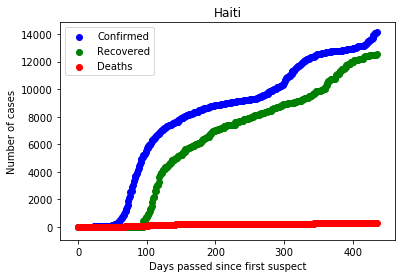

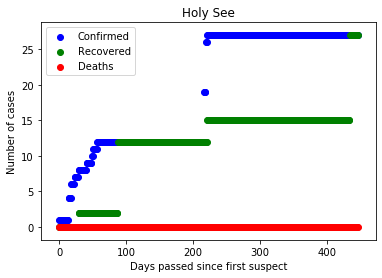

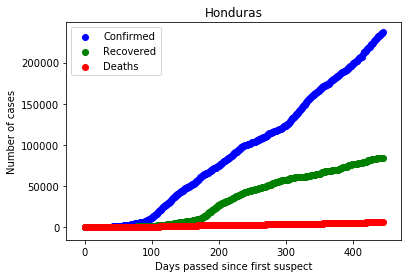

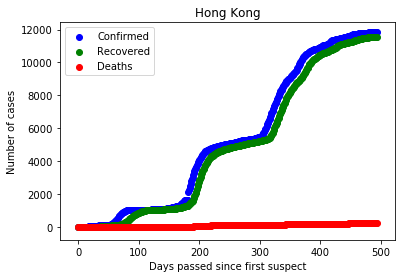

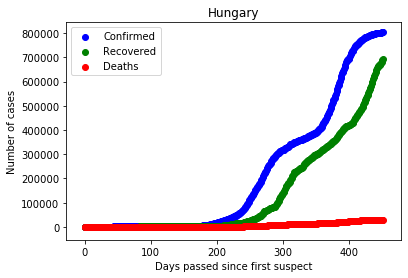

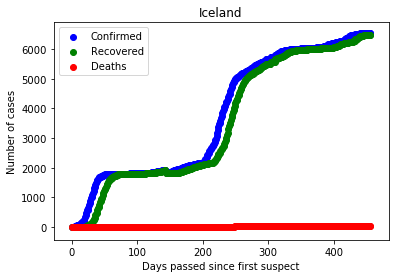

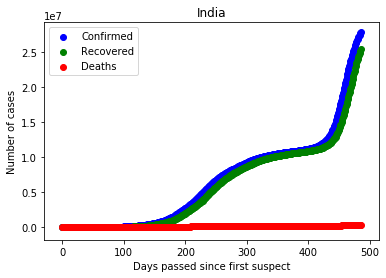

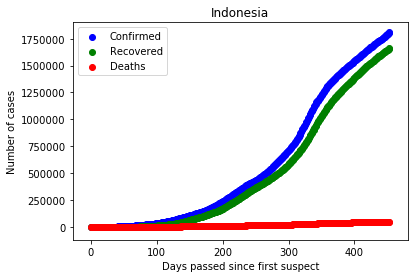

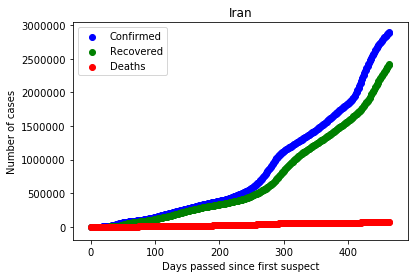

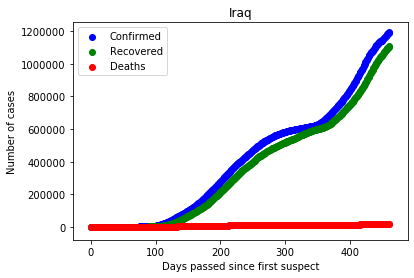

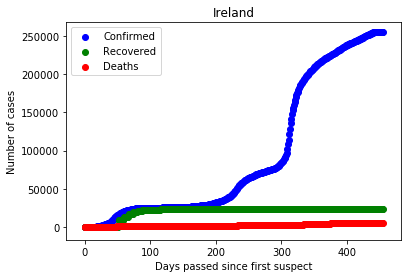

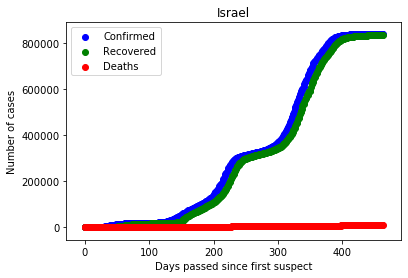

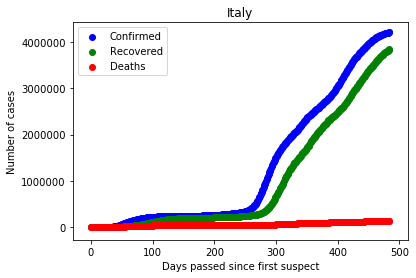

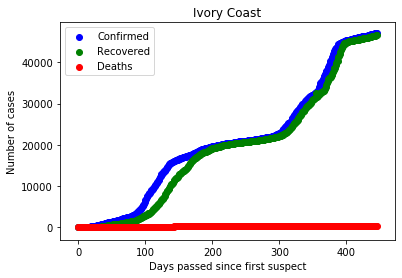

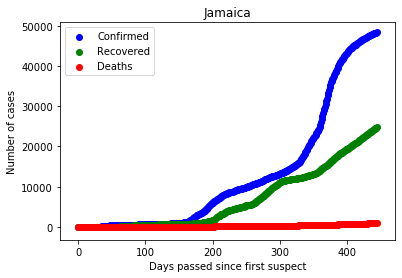

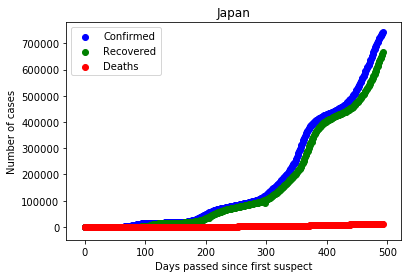

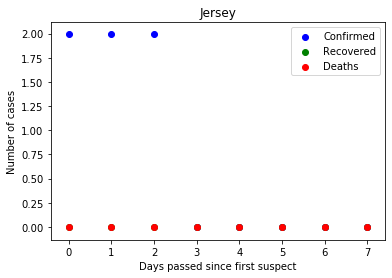

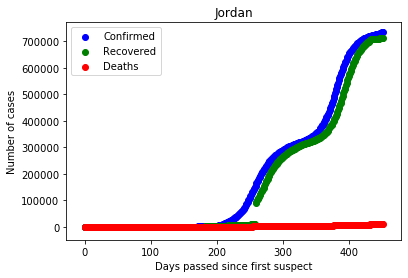

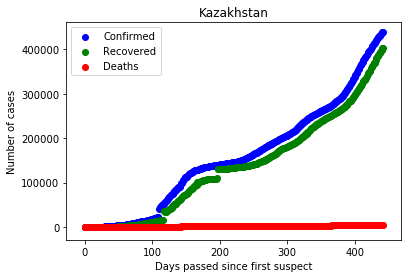

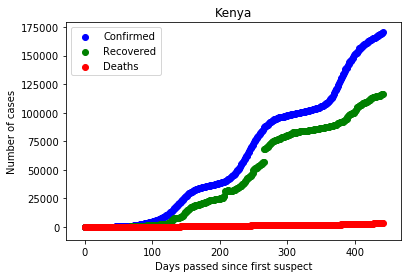

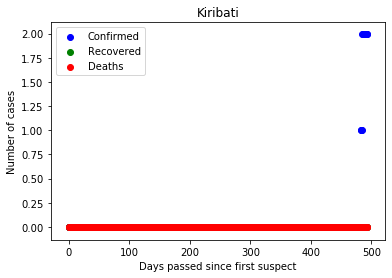

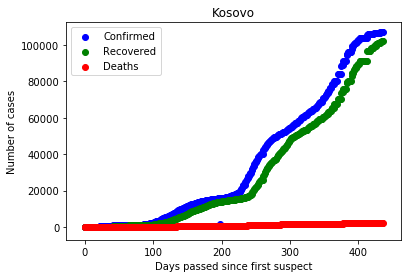

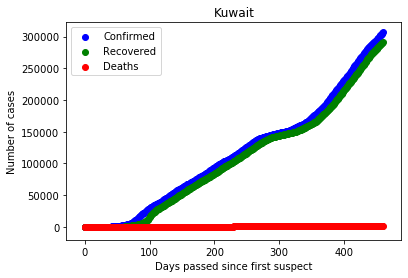

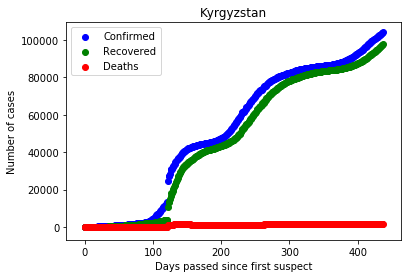

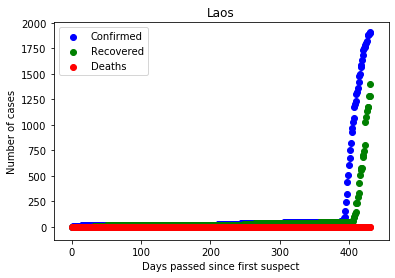

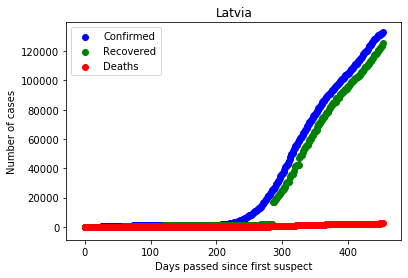

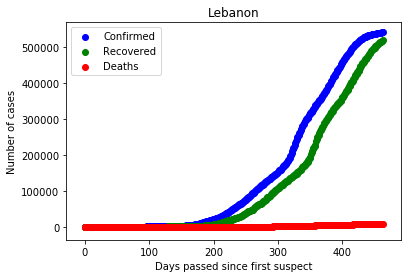

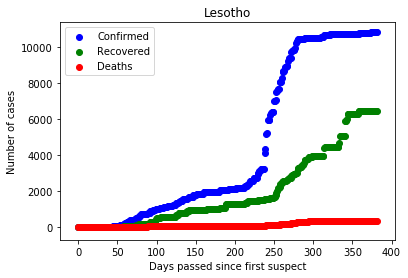

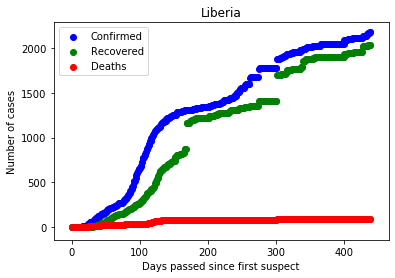

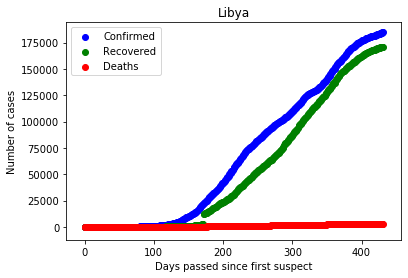

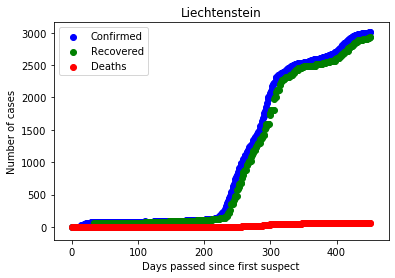

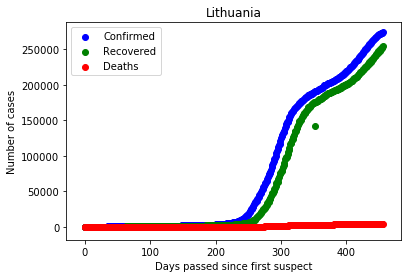

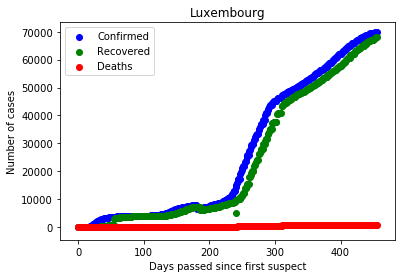

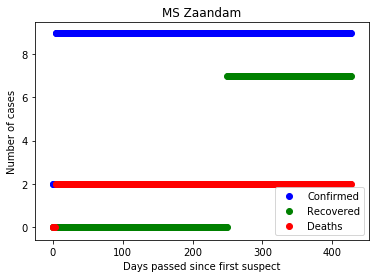

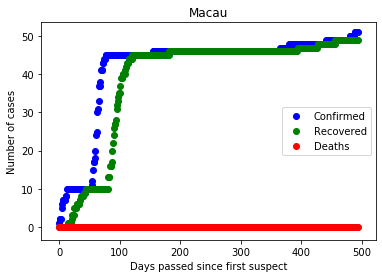

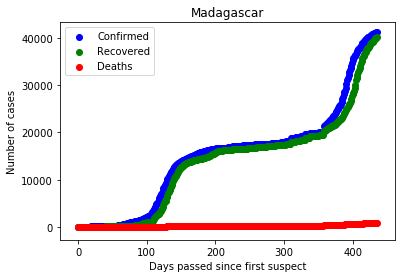

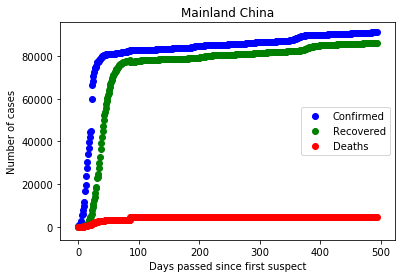

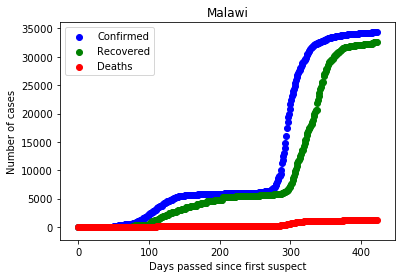

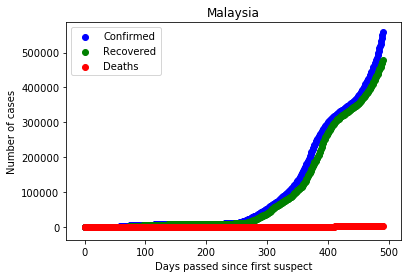

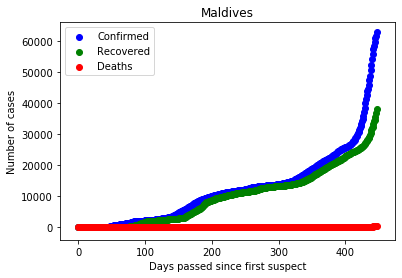

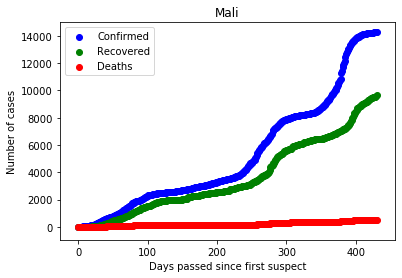

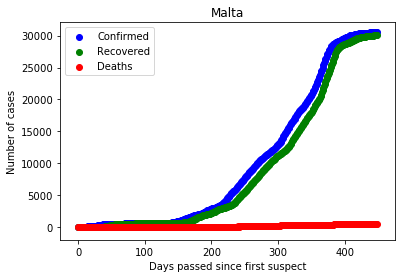

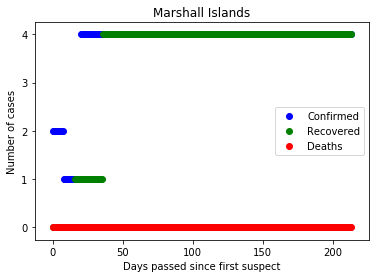

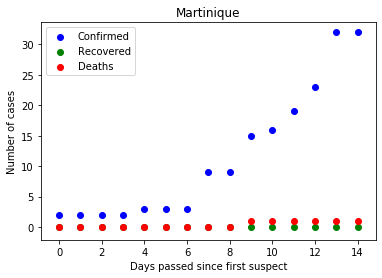

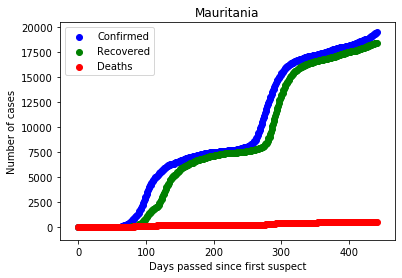

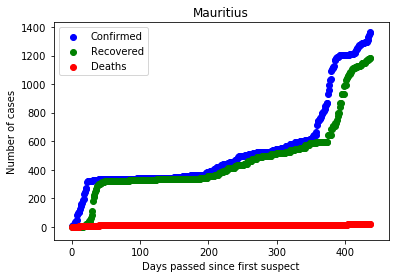

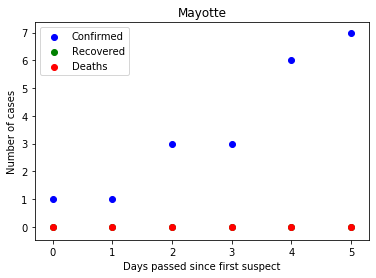

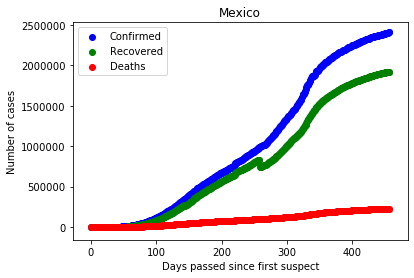

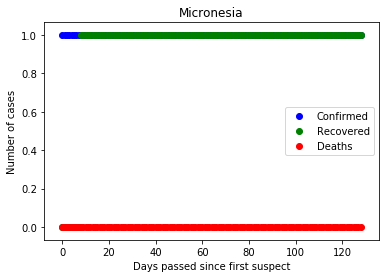

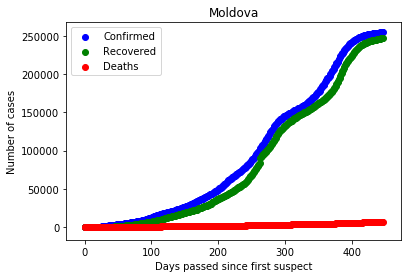

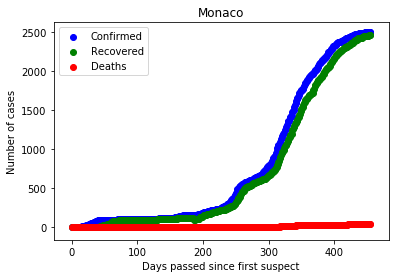

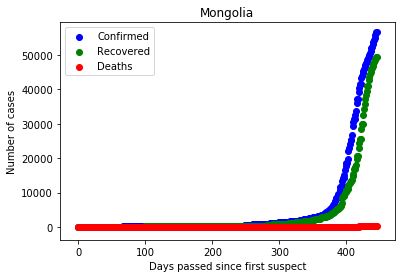

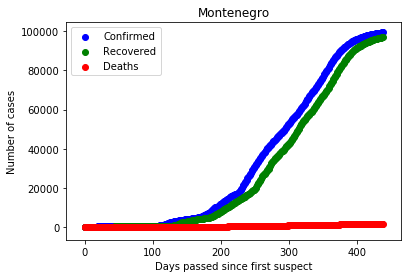

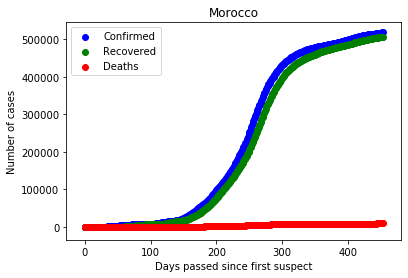

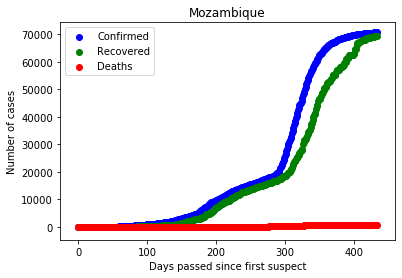

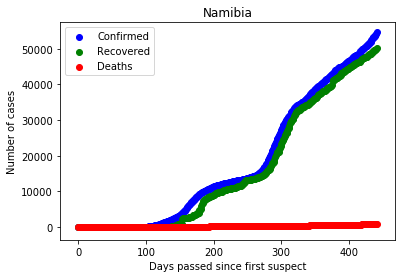

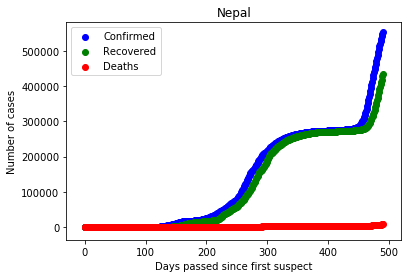

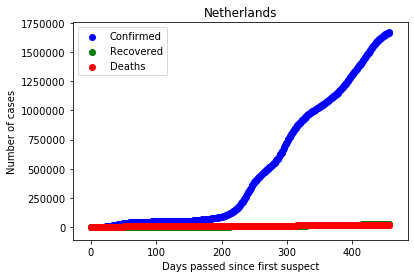

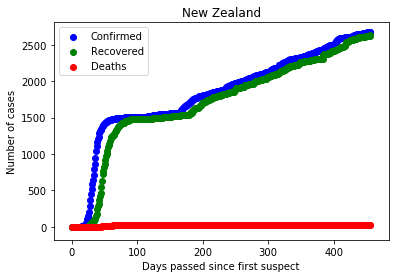

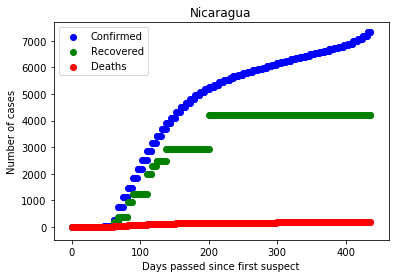

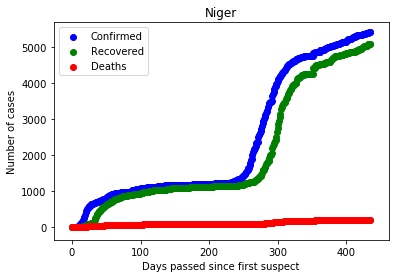

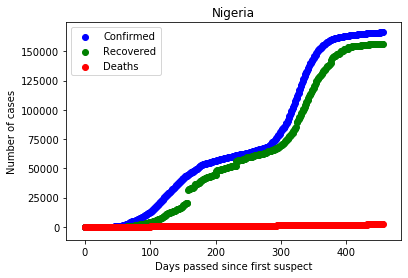

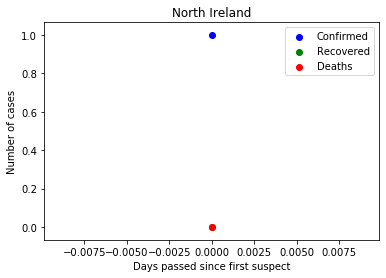

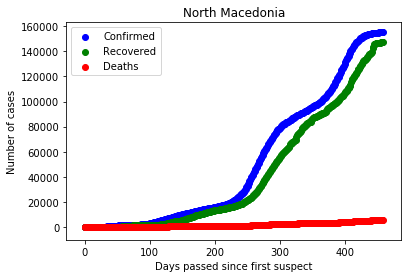

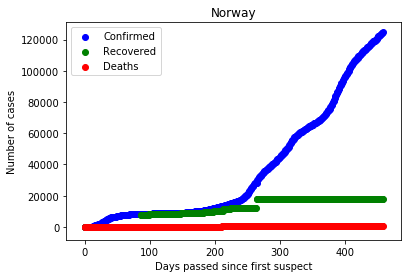

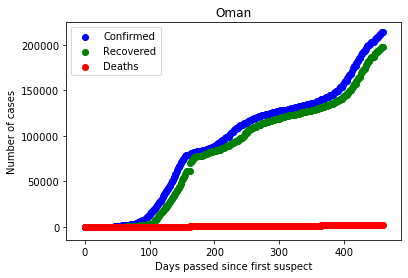

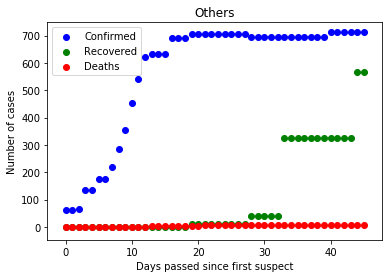

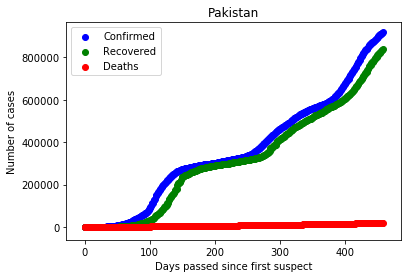

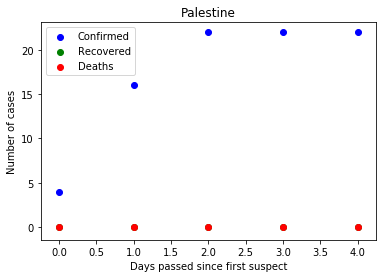

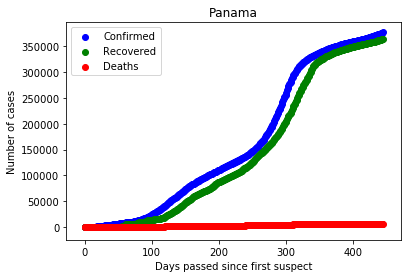

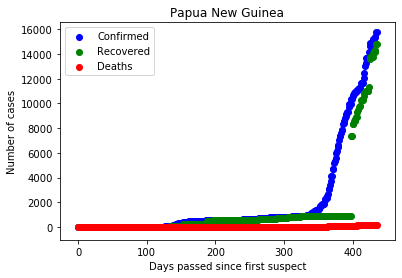

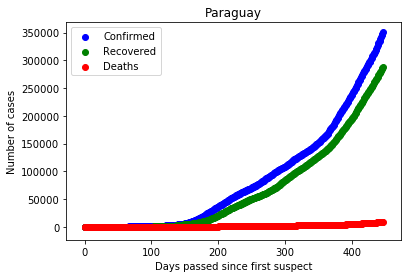

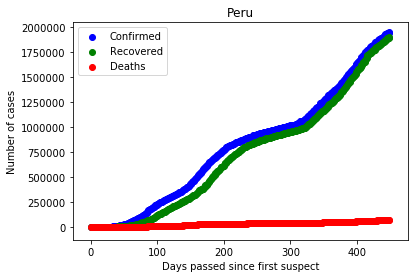

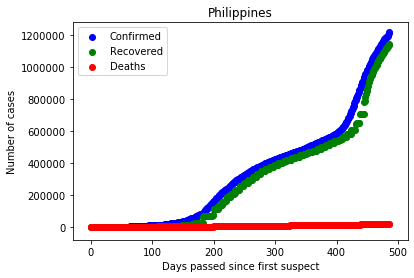

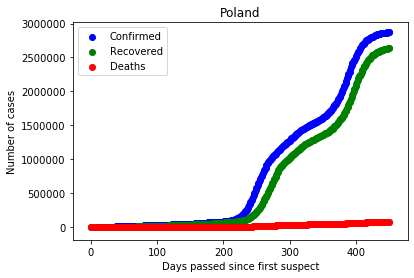

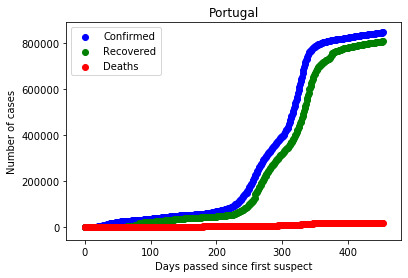

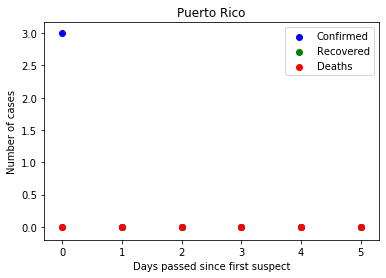

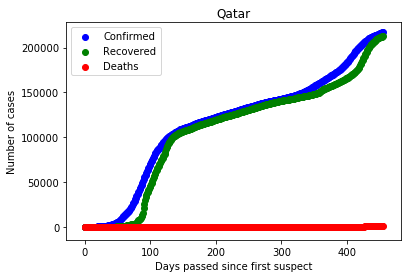

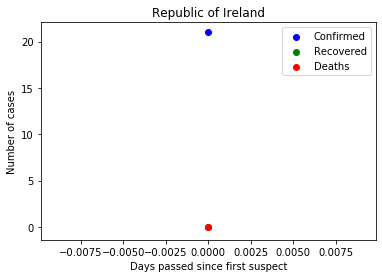

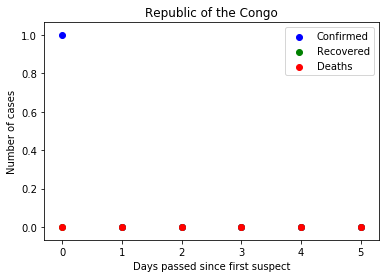

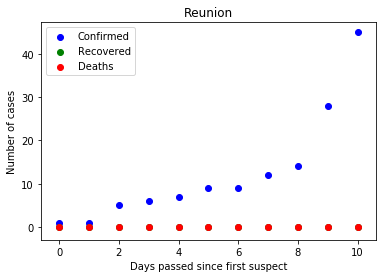

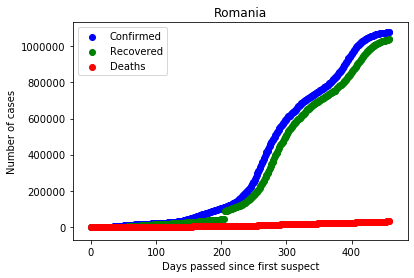

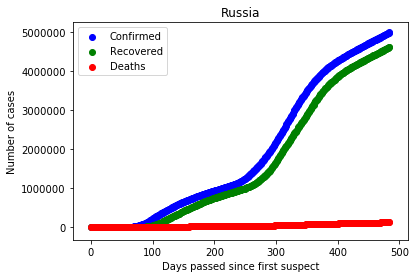

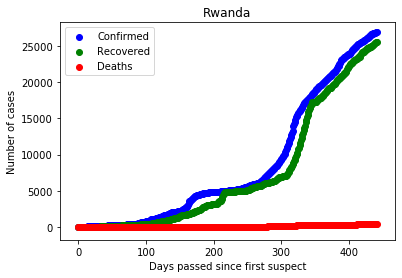

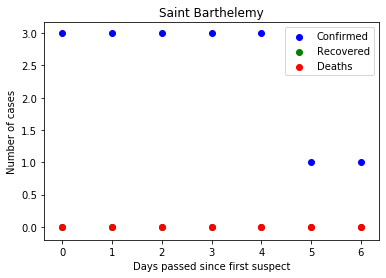

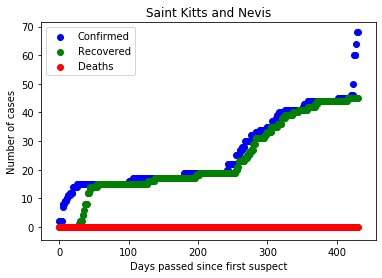

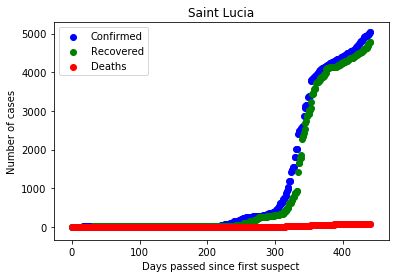

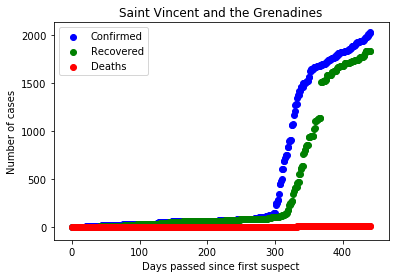

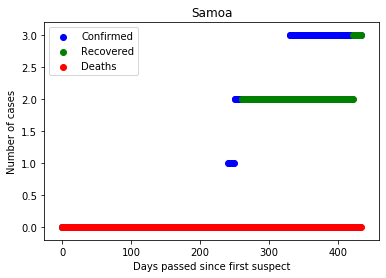

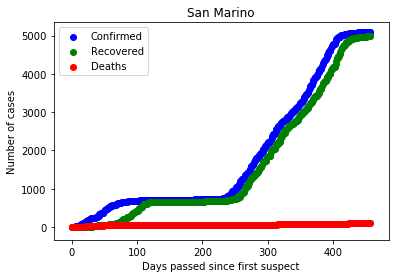

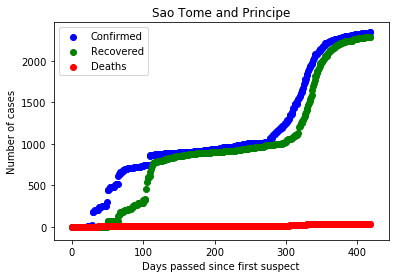

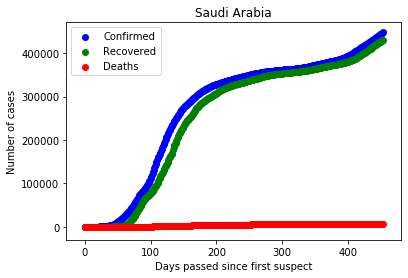

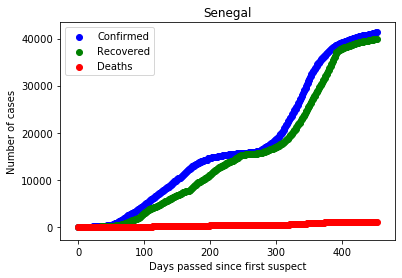

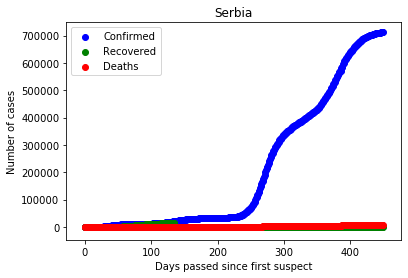

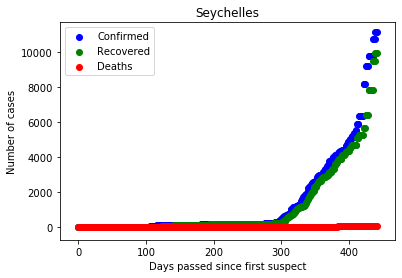

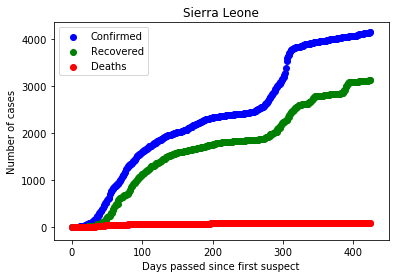

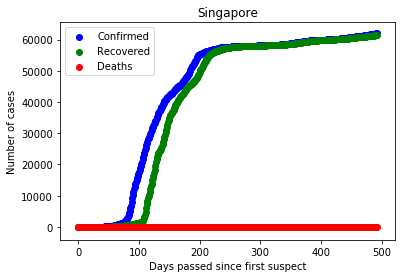

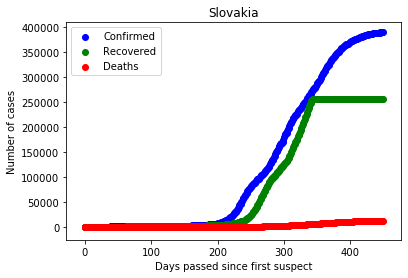

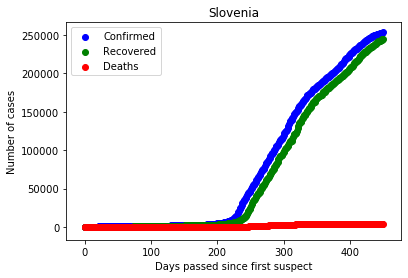

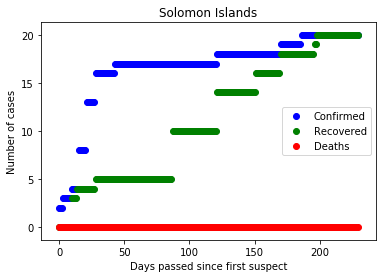

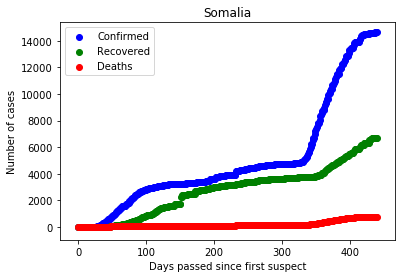

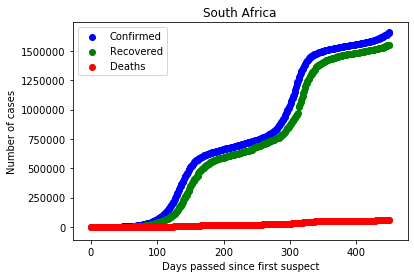

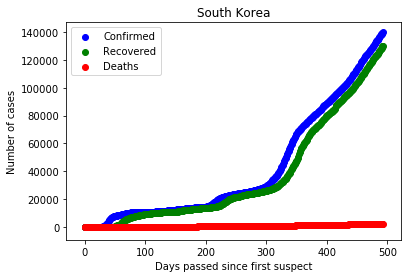

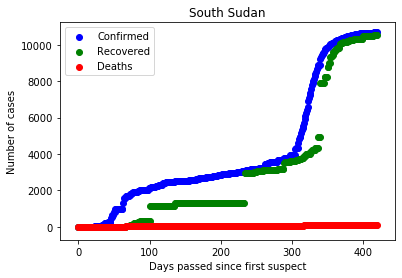

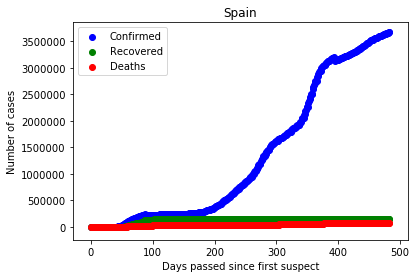

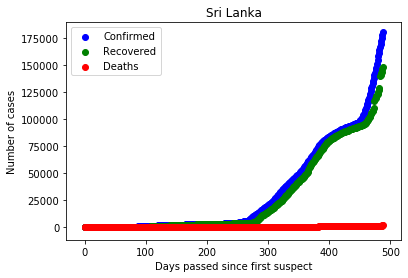

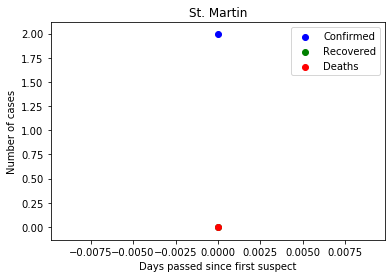

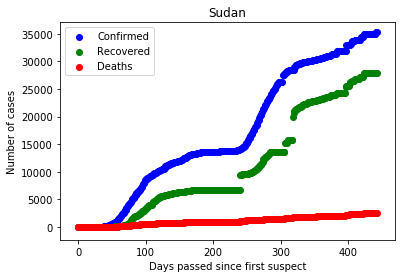

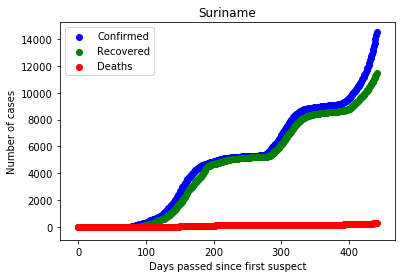

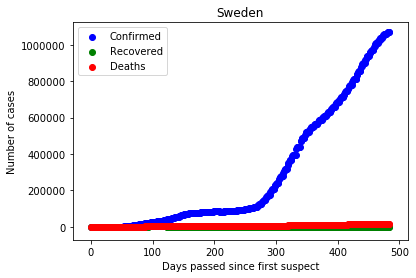

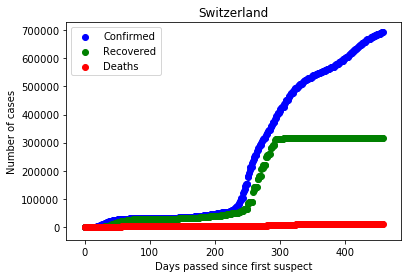

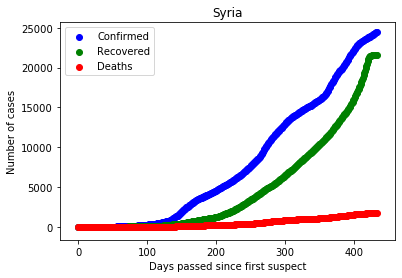

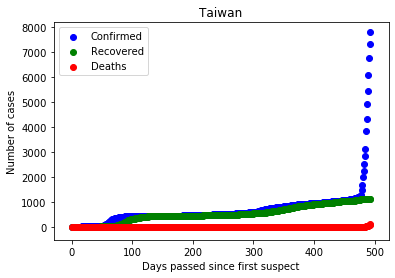

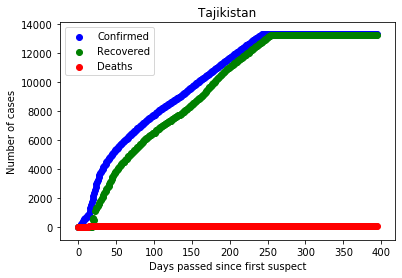

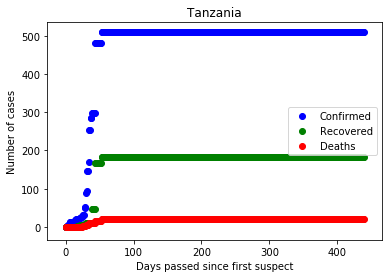

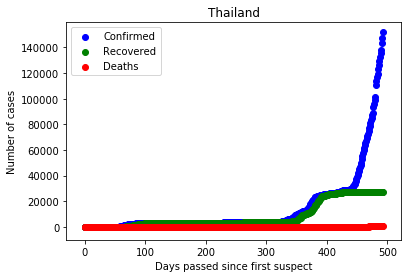

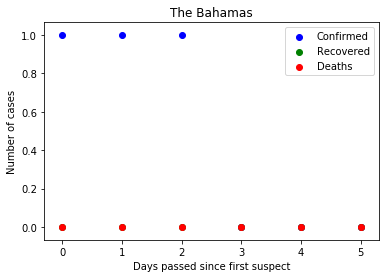

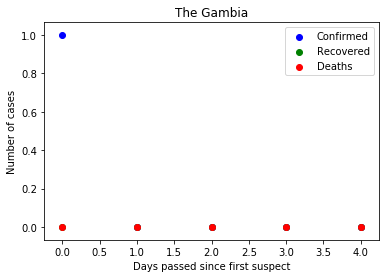

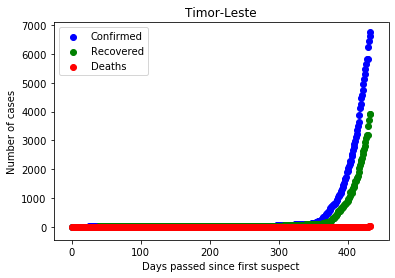

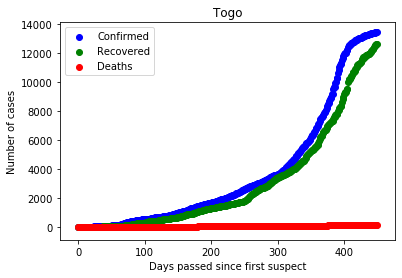

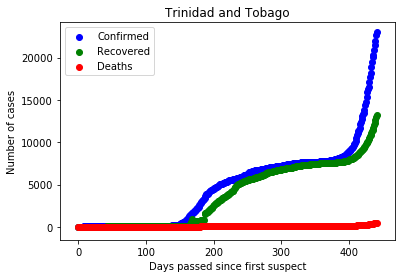

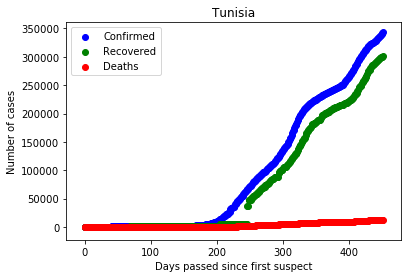

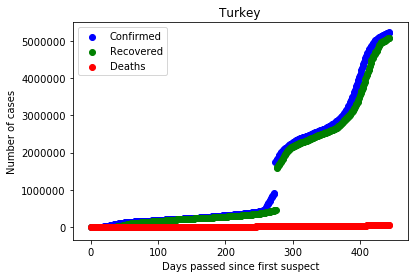

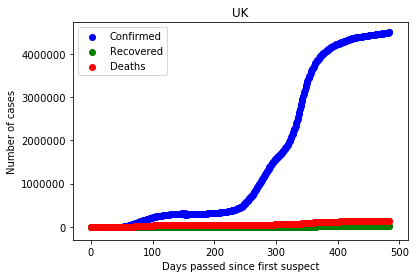

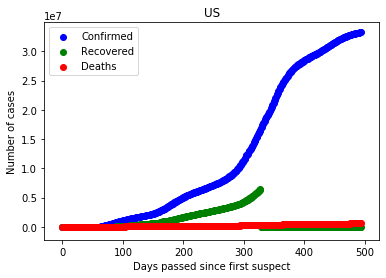

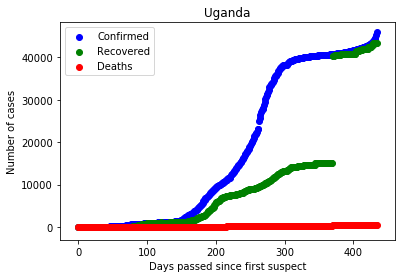

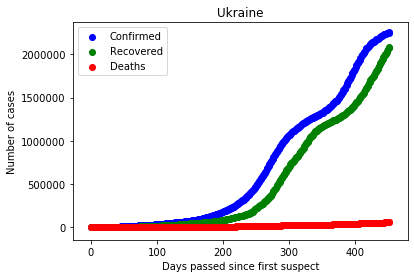

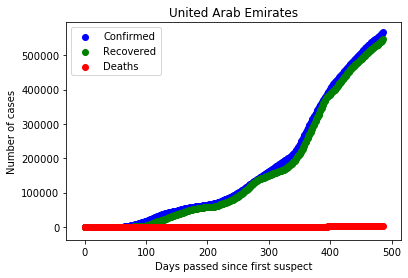

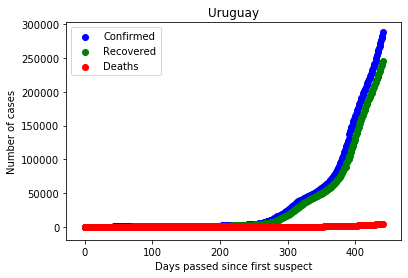

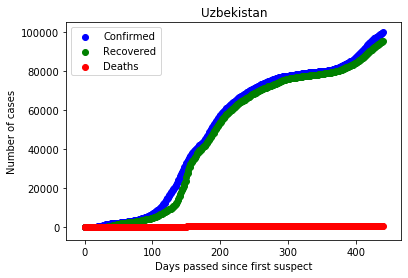

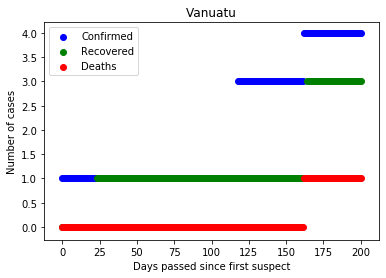

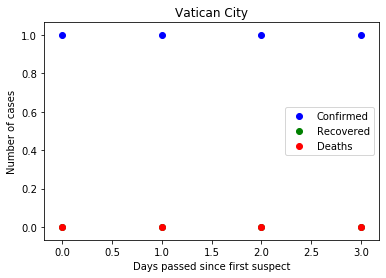

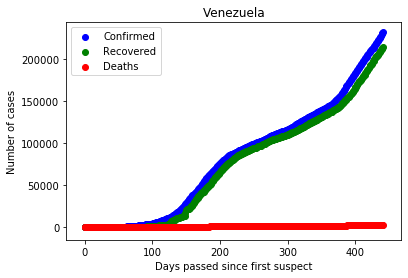

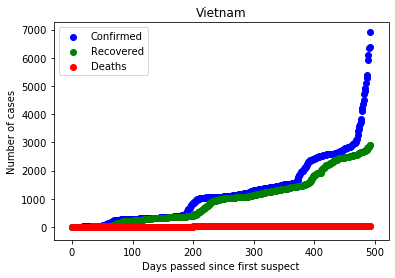

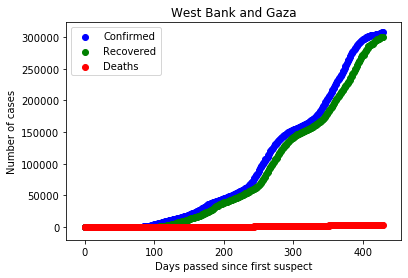

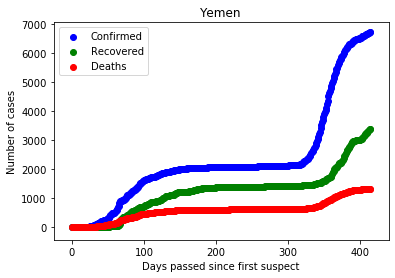

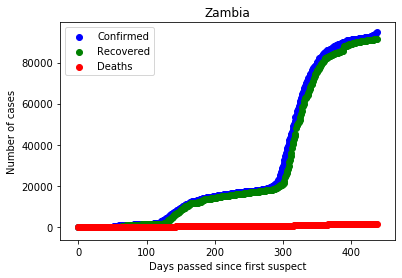

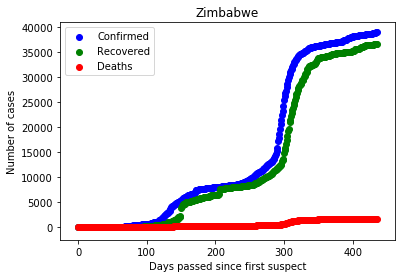

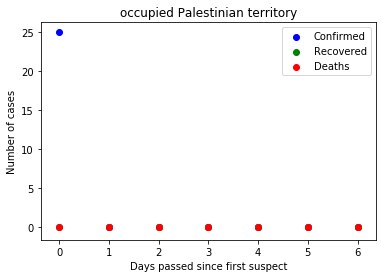

In [115]:
# goal: display trend of death patients, confirmed and recovered patients
# looping over each country again and again

for idx in range(0, len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()  # check the country using index
    plt.scatter(np.arange(0,len(C)), C['Confirmed'], color = 'blue', label='Confirmed')
    plt.scatter(np.arange(0,len(C)), C['Recovered'], color = 'green', label='Recovered')
    plt.scatter(np.arange(0,len(C)), C['Deaths'], color = 'red', label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days passed since first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()